In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

## Explore and Clean Data 

In [31]:
va_crime = pd.read_csv('va_crime_2013.csv', skiprows=4)

In [32]:
va_crime.head(10)

,City,Population,Violent_Crime,Murder,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson
0,Abingdon,8186,10,0,3,1,6,233,20,198,15,4
1,Alexandria,148519,258,5,21,118,114,2967,249,2427,291,13
2,Altavista,3486,8,0,0,2,6,56,4,52,0,0
3,Amherst,2223,2,0,2,0,0,27,6,19,2,0
4,Appalachia,1728,12,0,2,2,8,77,25,51,1,0
5,Ashland,7310,26,0,1,8,17,246,14,221,11,1
6,Bedford,5894,12,0,4,3,5,237,26,199,12,0
7,Berryville,4290,5,0,2,1,2,80,7,72,1,0
8,Big Stone Gap,5568,17,0,5,0,12,203,21,176,6,2
9,Blacksburg,42603,31,0,7,4,20,523,91,417,15,8


In [33]:
#Drop empty column
va_crime.drop(va_crime.columns[len(va_crime.columns)-1], axis=1, inplace=True)

In [34]:
#Determine missing values across dataframe
missing_values_count = va_crime.isnull().sum()
print(missing_values_count)

City                   0
Population             0
Violent_Crime          0
Murder                 0
Rape                   0
Robbery                0
Aggravated_Assault     0
Property_Crime         0
Burglary               0
Larceny_Theft          0
Motor_Vehicle_Theft    0
dtype: int64


In [35]:
va_crime.dtypes

City                   object
Population              int64
Violent_Crime           int64
Murder                  int64
Rape                    int64
Robbery                 int64
Aggravated_Assault      int64
Property_Crime          int64
Burglary                int64
Larceny_Theft           int64
Motor_Vehicle_Theft     int64
dtype: object

In [36]:
va_crime.Rape.describe()

count    149.000000
mean       6.919463
std       18.423882
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max      140.000000
Name: Rape, dtype: float64

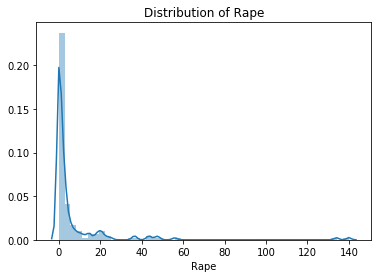

In [37]:
#First, let's look at our outcome variable.
sns.distplot(va_crime.Rape)
plt.title('Distribution of Rape')
plt.show()

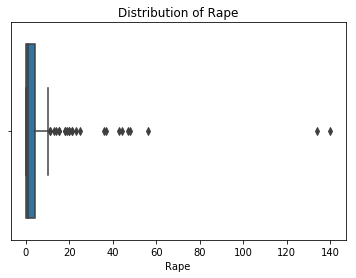

In [38]:
sns.boxplot(x=va_crime["Rape"])
plt.title('Distribution of Rape')
plt.show()

### Distribution of Rape is incredibly skewed right, as shown by the histogram and boxplot above. Let's try to remove some of these outliers before we run our models.

In [40]:
va_crime['Rape'].quantile(.95)

36.599999999999994

In [41]:
va_crime = va_crime[va_crime['Rape'] <= 36]

In [42]:
va_crime['Rape'].describe()

count    141.000000
mean       3.418440
std        6.190033
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       36.000000
Name: Rape, dtype: float64

### Engineer additional features

In [43]:
#Popuation_Squared
va_crime['Population_Squared'] = va_crime['Population']**2

In [44]:
#General Theft - Multiply Robbery, Larceny_Theft, Motor_Vehicle_Theft
va_crime['General_Theft'] = va_crime['Robbery'] * va_crime['Larceny_Theft'] * va_crime['Motor_Vehicle_Theft']

In [45]:
#Establish outcome variable (convert to binary)

va_crime['Rape'] = np.where((va_crime['Rape'] >= 1), 1, 0)

In [46]:
#Let's take a look at our new and improved dataframe

va_crime.head(5)

,City,Population,Violent_Crime,Murder,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Population_Squared,General_Theft
0,Abingdon,8186,10,0,1,1,6,233,20,198,15,67010596,2970
1,Alexandria,148519,258,5,1,118,114,2967,249,2427,291,22057893361,83338326
2,Altavista,3486,8,0,0,2,6,56,4,52,0,12152196,0
3,Amherst,2223,2,0,1,0,0,27,6,19,2,4941729,0
4,Appalachia,1728,12,0,1,2,8,77,25,51,1,2985984,102


In [47]:
rape_total = va_crime['Rape'].sum()
print('Baseline accuracy for Rape is: ' + str(round((rape_total/va_crime.shape[0])*100, 2)) + '%')

Baseline accuracy for Rape is: 56.03%


### Let's start building our models - Goal is to achieve higher accuracy than the baseline of approximately 56%
## Regular Logistic Regression Model


In [48]:
#Create dataframe slice for features
va_crime_features = va_crime.iloc[:,1:len(va_crime.columns)]

In [49]:
#Drop rape from features dataframe
va_crime_features.drop('Rape', axis=1, inplace=True)

In [50]:
# Declare a logistic regression classifier
lr = LogisticRegression()
Y = va_crime['Rape']
X = va_crime_features

# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(str(lr.score(X, Y)*100) + '%')

Coefficients
[[1.49622204e-12 1.58093279e-14 6.14939657e-17 2.84857386e-15
  8.12627570e-15 1.20674221e-13 1.34317417e-14 1.03196733e-13
  4.04574705e-15 1.55780445e-08 1.13325637e-11]]
[-9.5653136e-16]

 Accuracy
Rape    0   1
row_0        
1      62  79

 Percentage accuracy
56.02836879432624%


In [51]:
#Cross-Validation

display(cross_val_score(lr, va_crime_features, va_crime['Rape'], cv=5))

array([0.55172414, 0.55172414, 0.57142857, 0.57142857, 0.55555556])

### For our test data on the other hand, we see a lower success rate, shown through the cross-validation above. We also see overfitting, which may be taken care of by the lasso and ridge regression below.

## Lasso Logistic Regression Model

In [52]:
# Declare a logistic regression classifier, using penalty 'l1' to indicate lasso
lr_lasso = LogisticRegression(penalty='l1')
Y = va_crime['Rape']
X = va_crime_features

# Fit the model.
fit = lr_lasso.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn_lasso = lr_lasso.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn_lasso, Y))

print('\n Percentage accuracy')
print(str(lr_lasso.score(X, Y)*100) + '%')

Coefficients
[[-1.36311079e-04  1.97235885e+00  0.00000000e+00 -1.11076849e+00
  -1.65471062e+00  3.51445083e-03  5.64202645e-03 -1.21756055e-02
   1.03122775e-01 -4.33983131e-09 -7.47424823e-07]]
[-2.27848143]

 Accuracy
Rape    0   1
row_0        
0      60   6
1       2  73

 Percentage accuracy
94.32624113475178%


In [54]:
# Cross-Validation

display(cross_val_score(lr_lasso, va_crime_features, va_crime['Rape'], cv=5))

array([0.93103448, 0.79310345, 0.89285714, 0.96428571, 0.92592593])

### During cross-validation, we see slight fluctuation for our lasso logistic regression model. However, this is far more consistent than the logistic regression above.

## Ridge Logistic Regression Model

In [55]:
# Declare a logistic regression classifier, using penalty 'l2' to indicate ridge
lr_ridge = LogisticRegression(penalty='l2')
Y = va_crime['Rape']
X = va_crime_features

# Fit the model.
fit = lr_ridge.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn_ridge = lr_ridge.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn_ridge, Y))

print('\n Percentage accuracy')
print(str(lr_ridge.score(X, Y)*100) + '%')

Coefficients
[[1.49622204e-12 1.58093279e-14 6.14939657e-17 2.84857386e-15
  8.12627570e-15 1.20674221e-13 1.34317417e-14 1.03196733e-13
  4.04574705e-15 1.55780445e-08 1.13325637e-11]]
[-9.5653136e-16]

 Accuracy
Rape    0   1
row_0        
1      62  79

 Percentage accuracy
56.02836879432624%


In [56]:
#Cross-Validation

display(cross_val_score(lr_ridge, va_crime_features, va_crime['Rape'], cv=5))

array([0.55172414, 0.55172414, 0.57142857, 0.57142857, 0.55555556])

### Similar success rate as our logistic regression model above, but there is indication of overfitting when we test against our folds.

## Now that we've run several versions of the model, let's try using recursive feature selection on our original logistic regression model and try to improve based off those results

In [58]:
# Pass logistic regression model to the RFE constructor
from sklearn.feature_selection import RFE

selector = RFE(lr)
selector = selector.fit(va_crime_features, va_crime['Rape'])

In [59]:
print(selector.ranking_)

[1 2 7 6 4 1 3 1 5 1 1]


In [60]:
#Now turn into a dataframe so you can sort by rank

rankings = pd.DataFrame({'Features': va_crime_features.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
0,Population,1
5,Property_Crime,1
7,Larceny_Theft,1
9,Population_Squared,1
10,General_Theft,1
1,Violent_Crime,2
6,Burglary,3
4,Aggravated_Assault,4
8,Motor_Vehicle_Theft,5
3,Robbery,6


### Next Steps: Based on this information, let's remove some of these features (greater than ranking of 3 or higher) and run our models again.

In [61]:
#Redo our feature set
va_crime_features_revised = va_crime_features.drop(['Larceny_Theft','Property_Crime', 'Burglary', 'Population'], 1)

Regular Logistic Regression Model

In [62]:
lr2 = LogisticRegression()
Y = va_crime['Rape']
X = va_crime_features_revised

# Fit the model.
fit = lr2.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn2 = lr2.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn2, Y))

print('\n Percentage accuracy')
print(str(lr2.score(X, Y)*100) + '%')

Coefficients
[[1.58093229e-14 6.14939522e-17 2.84857299e-15 8.12627322e-15
  4.04574591e-15 1.55780445e-08 1.13325619e-11]]
[-9.56530948e-16]

 Accuracy
Rape    0   1
row_0        
1      62  79

 Percentage accuracy
56.02836879432624%


In [67]:
#Cross-Validation for revised logistic

display(cross_val_score(lr2, va_crime_features_revised, va_crime['Rape'], cv=5))

array([0.55172414, 0.55172414, 0.57142857, 0.57142857, 0.55555556])

### Lasso Logistic Regression Model

In [68]:
lr_lasso2 = LogisticRegression(penalty='l1')
Y = va_crime['Rape']
X = va_crime_features_revised

# Fit the model.
fit = lr_lasso2.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn_lasso2 = lr_lasso2.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn_lasso2, Y))

print('\n Percentage accuracy')
print(str(lr_lasso2.score(X, Y)*100) + '%')

Coefficients
[[ 3.03889047e+00  0.00000000e+00 -2.21514598e+00 -2.89105055e+00
   0.00000000e+00 -1.10627051e-08  7.75245503e-07]]
[-2.82283086]

 Accuracy
Rape    0   1
row_0        
0      61   0
1       1  79

 Percentage accuracy
99.29078014184397%


In [69]:
#Cross-Validation for revised lasso

display(cross_val_score(lr_lasso2, va_crime_features_revised, va_crime['Rape'], cv=5))

array([0.86206897, 0.79310345, 0.92857143, 0.96428571, 1.        ])

### Ridge Logistic Regression Model

In [70]:
# Declare a logistic regression classifier, using penalty 'l2' to indicate ridge
lr_ridge2 = LogisticRegression(penalty='l2')
Y = va_crime['Rape']
X = va_crime_features_revised

# Fit the model.
fit = lr_ridge2.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn_ridge2 = lr_ridge2.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn_ridge2, Y))

print('\n Percentage accuracy')
print(str(lr_ridge2.score(X, Y)*100) + '%')

Coefficients
[[1.58093229e-14 6.14939522e-17 2.84857299e-15 8.12627322e-15
  4.04574591e-15 1.55780445e-08 1.13325619e-11]]
[-9.56530948e-16]

 Accuracy
Rape    0   1
row_0        
1      62  79

 Percentage accuracy
56.02836879432624%


In [71]:
#Cross-Validation for revised ridge

display(cross_val_score(lr_ridge2, va_crime_features_revised, va_crime['Rape'], cv=5))

array([0.55172414, 0.55172414, 0.57142857, 0.57142857, 0.55555556])

### Evaluation of All Three Models
The first time through I used all features on all 3 models. They performed at the following success rates:

Logistic - 95.03%
Lasso - 97.87%
Ridge - 95.03%
The second time through, I redid the models based on recursive feature selection findings. These were the results the second time:

Logistic - 98.58%
Lasso - 99.29%
Ridge - 98.58%
That being said, most successful model was the revised lasso logistic regression model I created. I am comfortable enough with the cross-validation results to confirm that this model is trustworthy. I am interested to learn why the logistic and ridge model versions performed at the same level for both original and revised feature sets.